::GMG::**NOTAS**

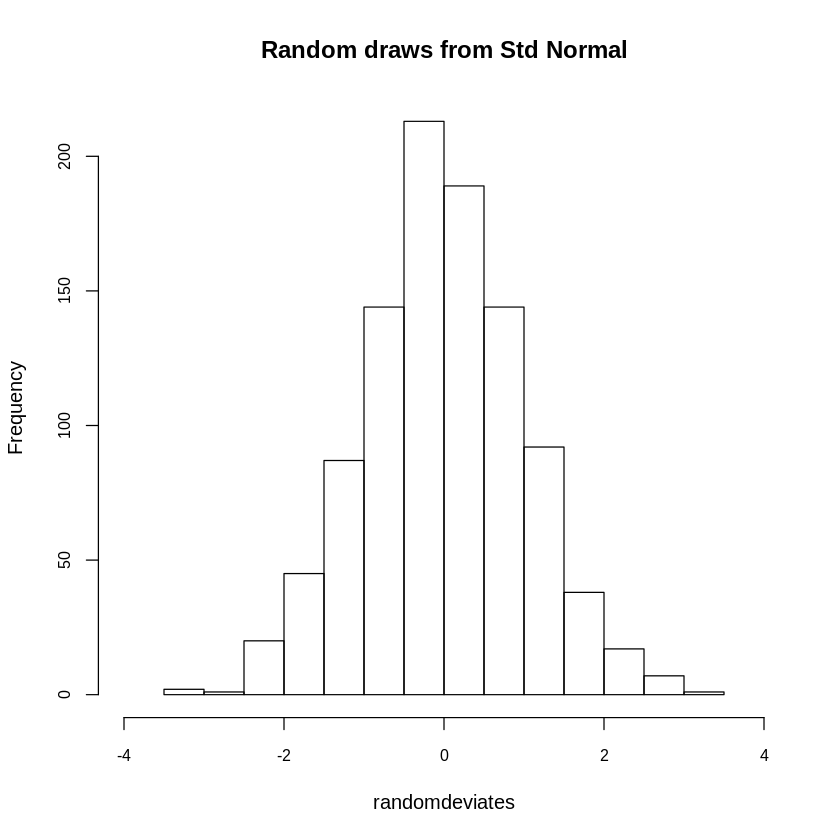

In [15]:
#  https://stackoverflow.com/questions/42488191/r-1000-rnorm-samples
#
#  X <- matrix(rnorm(25000), 1000, 25) 
#
#Each row of X is a sample of size 25 from the standard normal distribution. There are 1000 rows.
#@MattJ if you would like to sample one row randomly from X you can do: X[sample(x = 1000, size = 1), ]randomdeviates<-rnorm(1000,0,1)
hist(randomdeviates, main="Random draws from Std Normal", cex.axis=.8, xlim=c(-4,4))

In [55]:
m1<-matrix(rnorm(6),2,3)
m1

-0.0423644,0.7401660,-0.7697154
-1.2238582,-0.1217885,1.2495018


In [56]:
m2<-replicate(3, rnorm(2))
m2

0.7906875,-0.5800013,-0.8777586
0.3165321,0.7367999,-1.2639561


In [21]:
#http://zoonek2.free.fr/UNIX/48_R/07.html#2
limite.centrale <- function (r=runif, m=.5, s=1/sqrt(12), n=c(1,3,10,30), N=1000) {
  for (i in n) {
    x <- matrix(r(i*N),nc=i)
    x <- ( apply(x, 1, sum) - i*m )/(sqrt(i)*s)
    hist(x, col='light blue', probability=T, main=paste("n =",i), 
         ylim=c(0,max(.4, density(x)$y)))
    lines(density(x), col='red', lwd=3)
    curve(dnorm(x), col='blue', lwd=3, lty=3, add=T)
    if( N>100 ) {
      rug(sample(x,100))
    } else {
      rug(x)
    }
  }
}

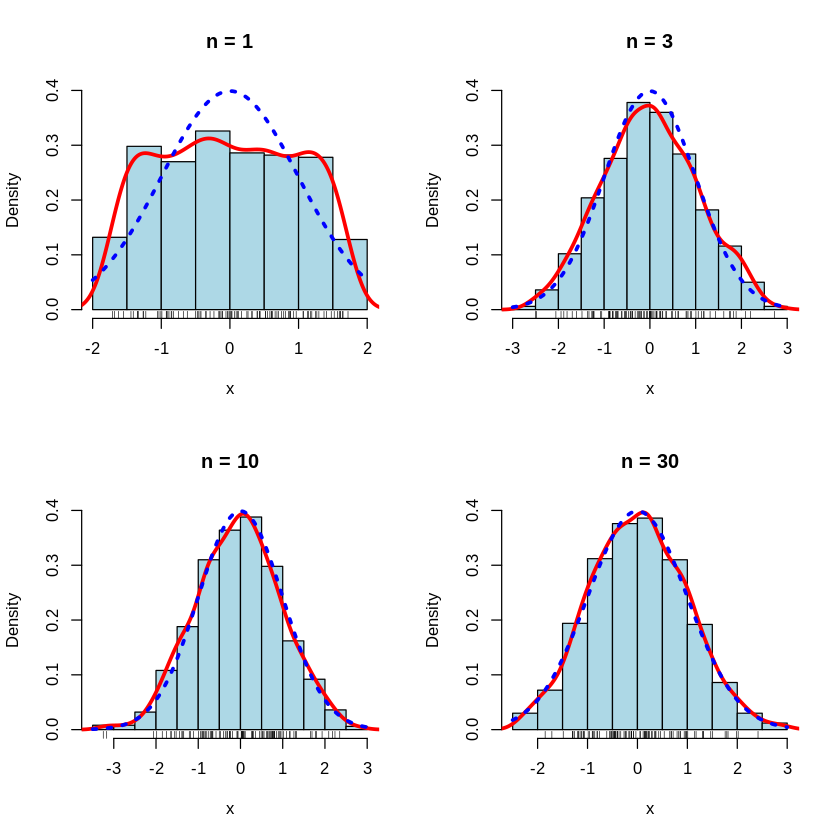

In [22]:
op <- par(mfrow=c(2,2))
limite.centrale()
par(op)

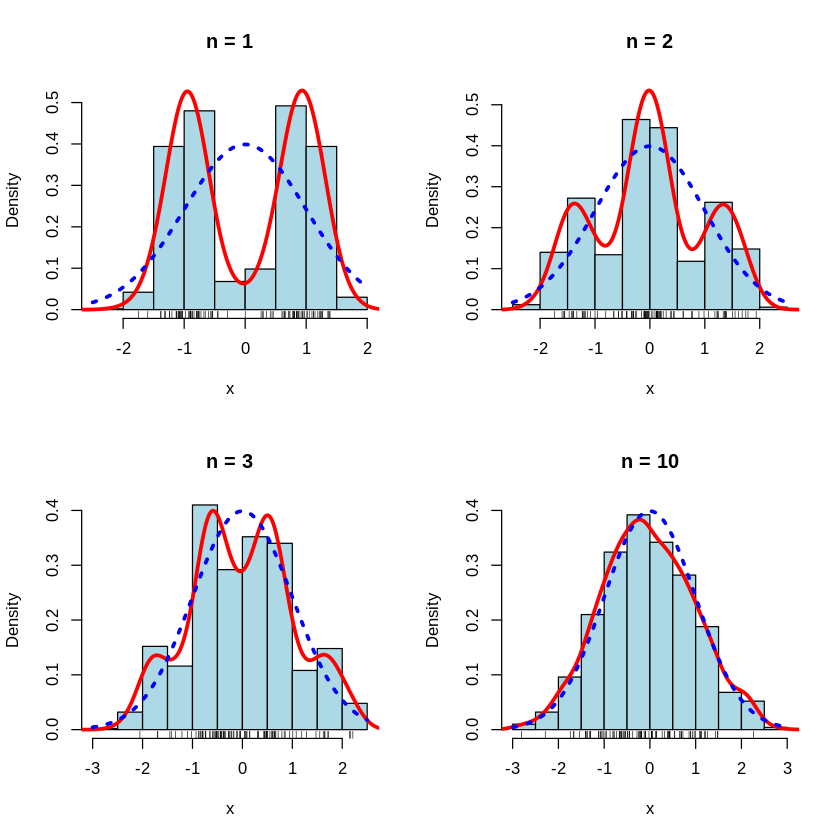

In [23]:
op <- par(mfrow=c(2,2))
limite.centrale(function (n) { rnorm(n, sample(c(-3,3),n,replace=T)) }, 
                m=0, s=sqrt(10), n=c(1,2,3,10))
par(op)

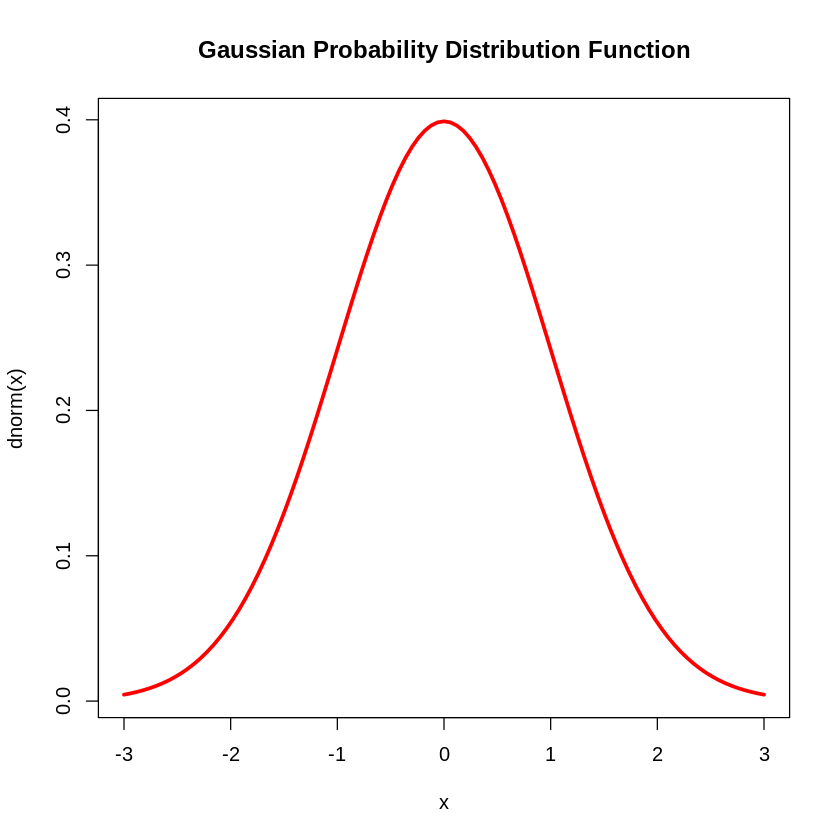

In [24]:
curve(dnorm(x), xlim=c(-3,3), col='red', lwd=3)
title(main='Gaussian Probability Distribution Function')

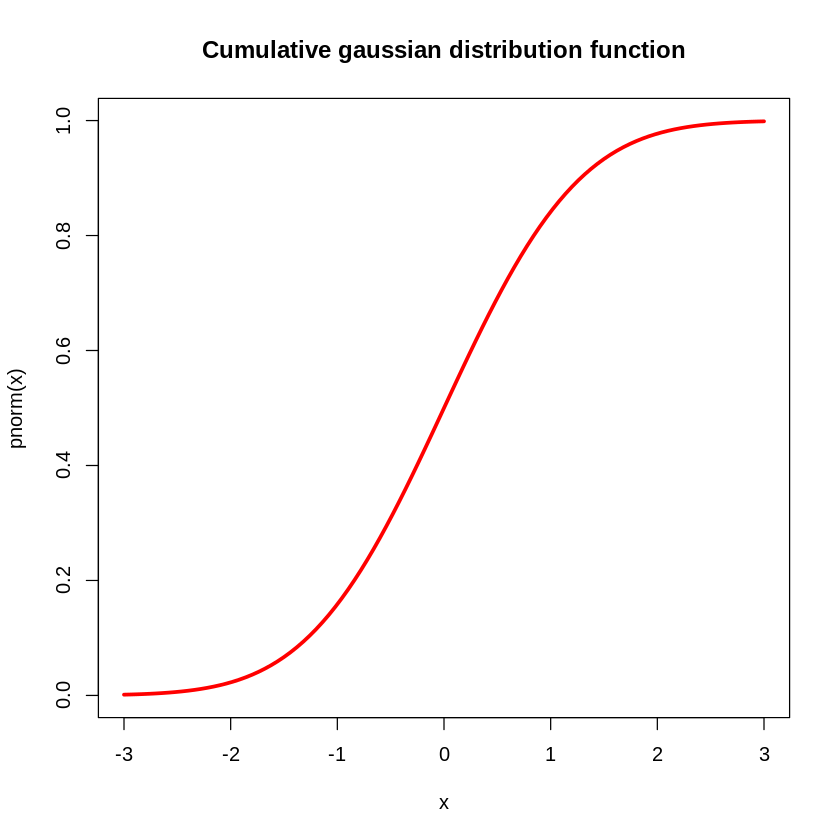

In [25]:
curve(pnorm(x), xlim=c(-3,3), col='red', lwd=3)
title(main='Cumulative gaussian distribution function')

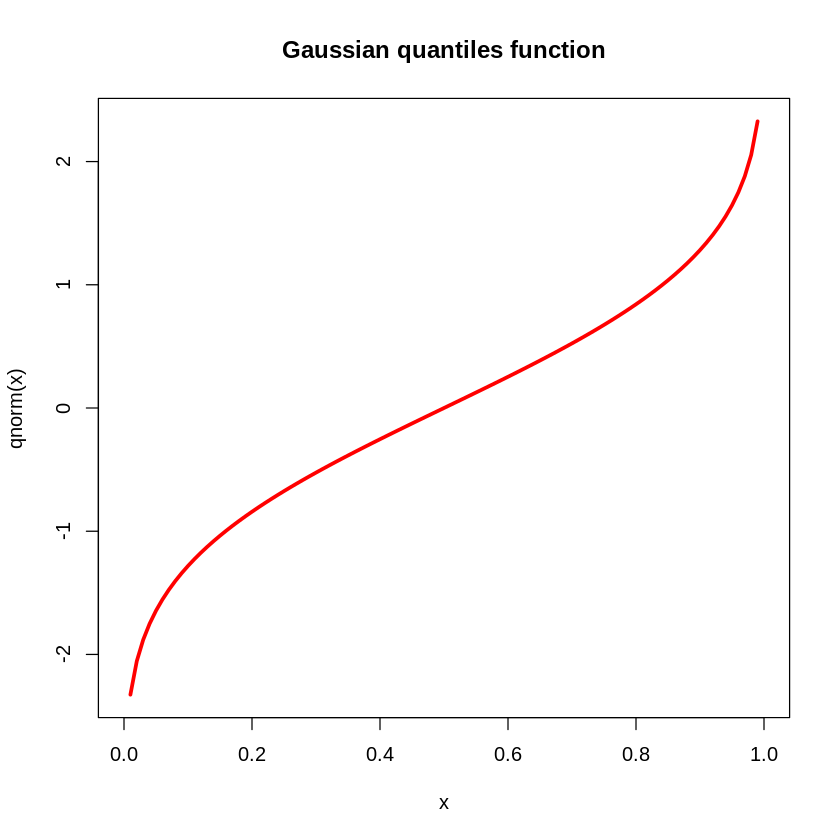

In [26]:
curve(qnorm(x), xlim=c(0,1), col='red', lwd=3)
title(main='Gaussian quantiles function')

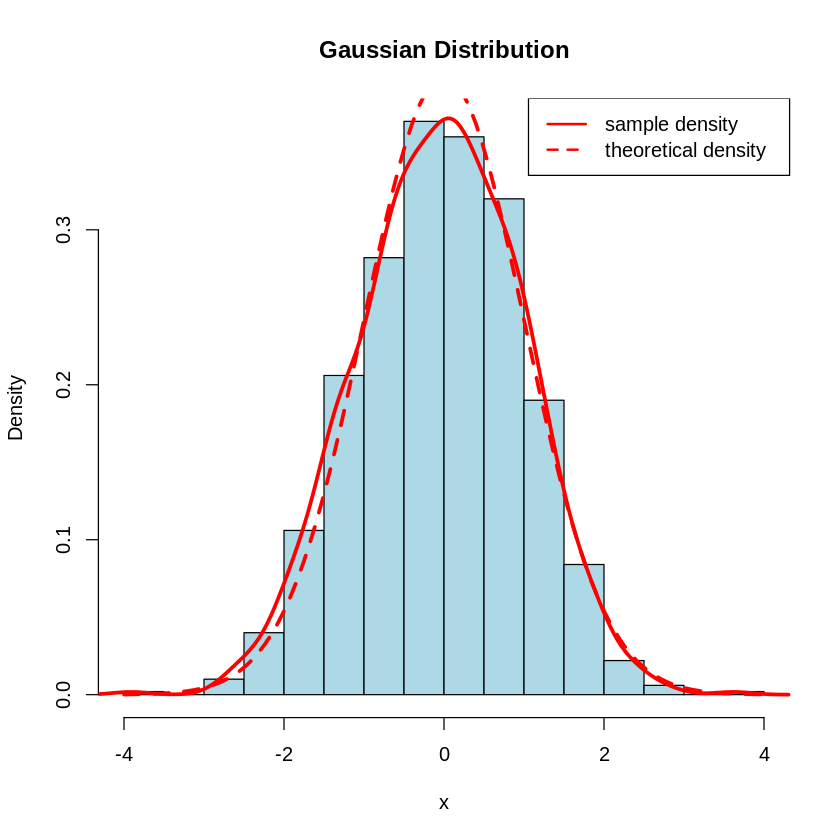

In [27]:
n <- 1000
x <- rnorm(n)
hist(x, probability=T, col='light blue', main='Gaussian Distribution')
lines(density(x), col='red', lwd=3)
curve(dnorm(x), add=T, col='red', lty=2, lwd=3)
legend(par('usr')[2], par('usr')[4], xjust=1,
       c('sample density', 'theoretical density'),
       lwd=2, lty=c(1,2),
       col='red')

AVanzado :

 - [Plotting multiple normal curves with ggplot2 without hardcoding means and standard deviations](https://stackoverflow.com/questions/47204418/plotting-multiple-normal-curves-with-ggplot2-without-hardcoding-means-and-standa)

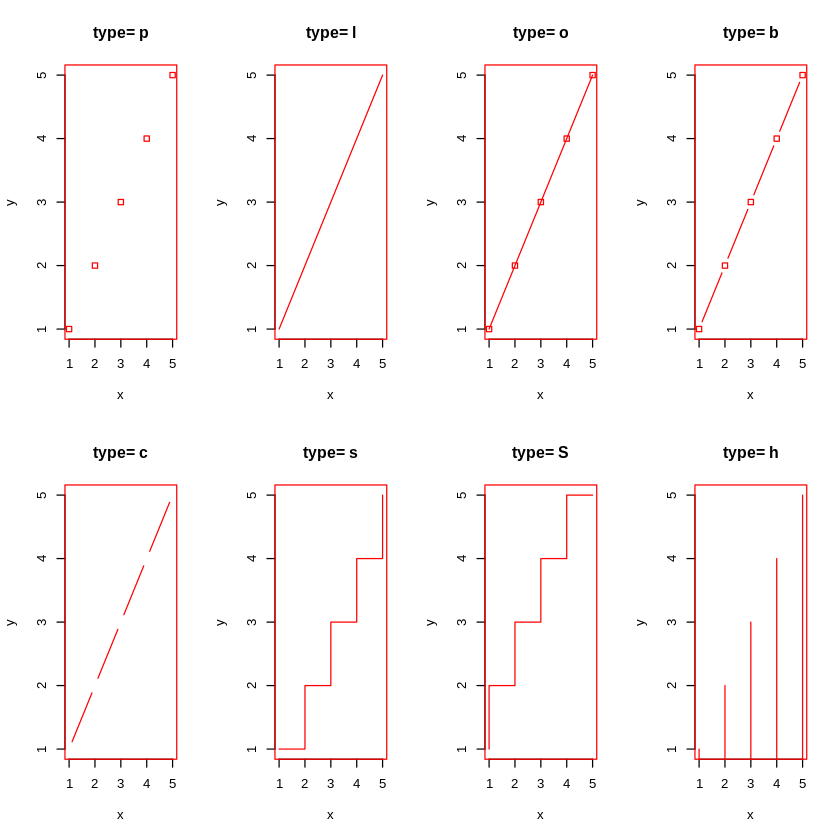

In [1]:
#::GMG::Notas
#
x <- c(1:5); y <- x # create some data 
par(pch=22, col="red") # plotting symbol and color 
par(mfrow=c(2,4)) # all plots on one page 
opts = c("p","l","o","b","c","s","S","h") 
for(i in 1:length(opts)){ 
  heading = paste("type=",opts[i]) 
  plot(x, y, type="n", main=heading) 
  lines(x, y, type=opts[i]) 
}

In [18]:
k = as.matrix(c(9,4,5))
l = as.matrix(c(3,2,7))
k
l
k-l
k*l
sum(k*l)
t(k)%*%l

9
4
5


3
2
7


6
2
-2


27
8
35


[1] 70

70


In [3]:
medida <- function(x,a=1,sigma=0.1) {
    return (a*x + rnorm(length(x), 0, sigma))
}

x <- runif(n = 100, min = 0, max = 10)
a <- 2
sigma <- 0.2
y <- medida(x = x,a = a,sigma = sigma)

In [9]:
a.0 <- 0
a.1 <- 2
alpha.m = as.matrix(c(a.0,a.1))
#alpha.m = matrix(c(a.0,a.1))
X <- cbind(c(rep(1,length(x))), x)
Z <- X%*%alpha.m
Y <- as.matrix(y)
dim(X)
dim(alpha.m)
dim(Z)
dim(Y)
paste(is.matrix(X),is.matrix(alpha.m), is.matrix(Z), is.matrix(Y))
alpha.m
X[1:3,]
Z[1:3]
Y[1:3]
T1 = Y - X%*%alpha.m
T2 = Y - Z
T1[1:3]
T2[1:3]
dim(t(T1))
dim(T1)
t(T1)%*%T1
t(Y - X%*%alpha.m)%*%(Y - X%*%alpha.m)

[1] 100   2

[1] 2 1

[1] 100   1

[1] 100   1

[1] "TRUE TRUE TRUE TRUE"

0
2


,x
1,2.718134
1,6.993103
1,2.965464


[1]  5.436269 13.986207  5.930928

[1]  5.340468 14.156584  5.864118

[1] -0.09580063  0.17037717 -0.06681020

[1] -0.09580063  0.17037717 -0.06681020

[1]   1 100

[1] 100   1

3.53188


3.53188


In [ ]:
loss <- function(alpha,x,y) {
    return (sum((y - alpha*x) * (y - alpha*x)))
}

In [60]:
loss.v <- function(alpha,X,y) {
    alpha.m <- as.matrix(alpha)
    y.m <- as.matrix(y)
    #X <- as.matrix(cbind(1,x))
    return (t(y.m - X %*% alpha.m) %*% (y.m - X %*% alpha.m))
}

In [61]:
a.2 <- 3
a <- c(a.0,a.1)
a
loss.v(a,as.matrix(cbind(1,x)),y)

[1] 0 2

3.53188


In [47]:
xx <- c(1,2)
#zz <- unname(cbind(1,xx,xx*xx))
zz <- Reduce(function(x,y) Map(cbind, x, y),list(xx, xx*xx,xx*xx*xx))
class(zz)
zz

[1] "list"

1,1,1
2,4,8


In [56]:
matrix(replicate(n = 1,expr = unname(cbind(1,xx))),nrow = 2)

1,1
1,2


In [55]:
t(mapply(cbind, 1, xx, xx*xx, xx*xx*xx))

1,1,1,1
1,2,4,8


In [4]:
x=list(1,2,3,4)
rapply(x,function(x){x^2},class=c("numeric"))
lapply(x,function(x){x^2})

[1]  1  4  9 16

[[1]]
[1] 1

[[2]]
[1] 4

[[3]]
[1] 9

[[4]]
[1] 16